# Applying fuzzy clustering to new dataset

In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')

from importlib import reload
import ExtractRulesQPSO
reload(ExtractRulesQPSO)

from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering
from FuzzyRule import FuzzyRule

In [2]:
df = pd.read_csv('./data/data_extraction.csv', header=1)
df.head()

,x,y,x.1,y.1,x.2,y.2
0,-1.513584,2.021725,-1.407596,-0.688274,2.236173,2.033473
1,-1.231298,2.011772,-1.159470,-0.651288,2.387670,1.929299
2,-1.247023,1.969969,-1.025865,-0.692831,2.306333,1.850828
3,-0.716827,2.007446,-1.539035,-0.751166,2.024913,1.819007
4,-0.831566,1.939361,-1.504118,-0.834656,2.194410,1.646978


In [3]:
df = df.dropna()

## Processing the data into three classes

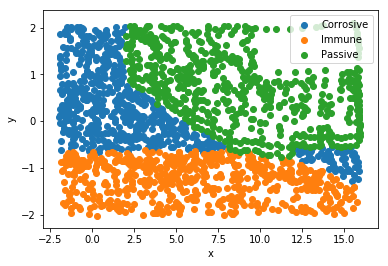

In [4]:
data_corrosive = []
for idx in range(df.shape[0]):
    tmp = np.array([df['x'][idx], df['y'][idx]])
    data_corrosive.append(tmp)

data_corrosive = np.array(data_corrosive)


data_immune = []
for idx in range(df.shape[0]):
    tmp = np.array([df['x.1'][idx], df['y.1'][idx]])
    data_immune.append(tmp)

data_immune = np.array(data_immune)

data_passive = []
for idx in range(df.shape[0]):
    tmp = np.array([df['x.2'][idx], df['y.2'][idx]])
    data_passive.append(tmp)

data_passive = np.array(data_passive)


plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Applying the fuzzy clustering

In [5]:
fc_corrosive = FuzzyClustering(data_corrosive)
fc_immune = FuzzyClustering(data_immune)
fc_passive = FuzzyClustering(data_passive)

In [6]:
## finding centers
fc_corrosive.extractClusteringCenters()
centers_corrosive = fc_corrosive.getDenormalizedClusterCenters()

fc_immune.extractClusteringCenters()
centers_immune = fc_immune.getDenormalizedClusterCenters()

fc_passive.extractClusteringCenters()
centers_passive = fc_passive.getDenormalizedClusterCenters()

In [7]:
centers_corrosive, centers_immune, centers_passive

(array([[ 1.32324787,  0.18815782],
        [-0.07605351,  1.53221157],
        [14.12542624, -0.80567493]]), array([[ 5.28647386, -1.03171314],
        [12.11300867, -1.30589751],
        [ 3.55608945, -1.73434535],
        [-1.7191681 , -0.86636178],
        [12.47983819, -1.93150632]]), array([[ 5.8713815 ,  1.05926162],
        [12.53972506,  0.18461917],
        [ 6.84574051, -0.20915567],
        [15.8229878 ,  1.36782823]]))

In [8]:
centers_corrosive_df = pd.DataFrame(centers_corrosive)
num_rules_corrosive = len(centers_corrosive)
centers_corrosive_df.columns = ['x' + str(i + 1) for i in range(len(centers_corrosive[0]))]
centers_corrosive_df['class_label'] = 'Corrosive'

centers_immune_df = pd.DataFrame(centers_immune)
num_rules_immune = len(centers_immune)
centers_immune_df.columns = ['x' + str(i + 1) for i in range(len(centers_immune[0]))]
centers_immune_df['class_label'] = 'Immune'

centers_passive_df = pd.DataFrame(centers_passive)
num_rules_passive = len(centers_passive)
centers_passive_df.columns = ['x' + str(i + 1) for i in range(len(centers_passive[0]))]
centers_passive_df['class_label'] = 'Passive'

In [9]:
all_class_centers = []
all_class_centers.append(centers_corrosive)
all_class_centers.append(centers_immune)
all_class_centers.append(centers_passive)

all_class_centers

[array([[ 1.32324787,  0.18815782],
        [-0.07605351,  1.53221157],
        [14.12542624, -0.80567493]]), array([[ 5.28647386, -1.03171314],
        [12.11300867, -1.30589751],
        [ 3.55608945, -1.73434535],
        [-1.7191681 , -0.86636178],
        [12.47983819, -1.93150632]]), array([[ 5.8713815 ,  1.05926162],
        [12.53972506,  0.18461917],
        [ 6.84574051, -0.20915567],
        [15.8229878 ,  1.36782823]])]

## Plotting clustering results

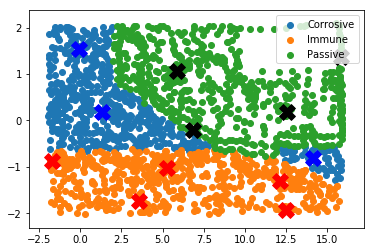

In [10]:
plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')

## Add centers of Corrosive
for cs in centers_corrosive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'blue', s = 250)

## Add centers of Immune
for cs in centers_immune:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)
    
## Add centers of Passive
for cs in centers_passive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'black', s = 250)

plt.legend();

In [69]:
data_immune[0]

array([-1.40759637, -0.68827375])

## QPSO

In [96]:
qpso = ExtractRulesQPSO(20, 50, 2 * (len(centers_corrosive) + len(centers_immune) + len(centers_passive)))

In [97]:
qpso.solver([centers_corrosive, centers_immune, centers_passive], 
            [data_corrosive, data_immune, data_passive])

In [98]:
qpso.best_particle

array([ -5.65095272,   0.30964917,  -1.77035264,   1.81294316,
         0.74957067,  -0.29612717,   2.15734569,   0.40276599,
       -38.85773499,  -0.36422895, -28.8353197 ,   0.63113803,
         3.36355579,  -0.31910204, -29.46478507,  -0.08815745,
         2.17899752,   0.9574496 ,  -2.18153289,  -2.17014366,
         0.44426224, -82.02175145,   2.66595558, -84.33342422])

In [99]:
tuned_stds = ExtractRulesQPSO._arrangeStds(qpso.best_particle, all_class_centers)
stds_corrosive, stds_immune, stds_passive = tuned_stds
tuned_stds

[array([[-5.65095272,  0.30964917],
        [-1.77035264,  1.81294316],
        [ 0.74957067, -0.29612717]]), array([[  2.15734569,   0.40276599],
        [-38.85773499,  -0.36422895],
        [-28.8353197 ,   0.63113803],
        [  3.36355579,  -0.31910204],
        [-29.46478507,  -0.08815745]]), array([[  2.17899752,   0.9574496 ],
        [ -2.18153289,  -2.17014366],
        [  0.44426224, -82.02175145],
        [  2.66595558, -84.33342422]])]

In [100]:
stds_corrosive

array([[-5.65095272,  0.30964917],
       [-1.77035264,  1.81294316],
       [ 0.74957067, -0.29612717]])

## Showing rules

/Users/Minshen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

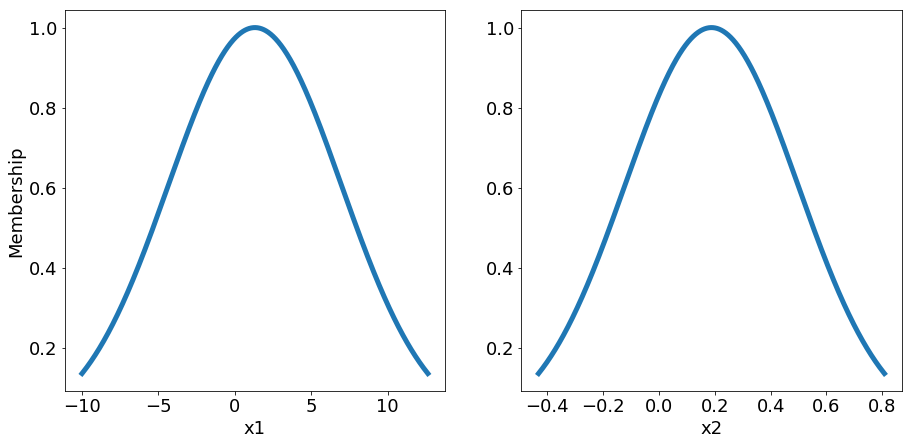

<Figure size 432x288 with 0 Axes>

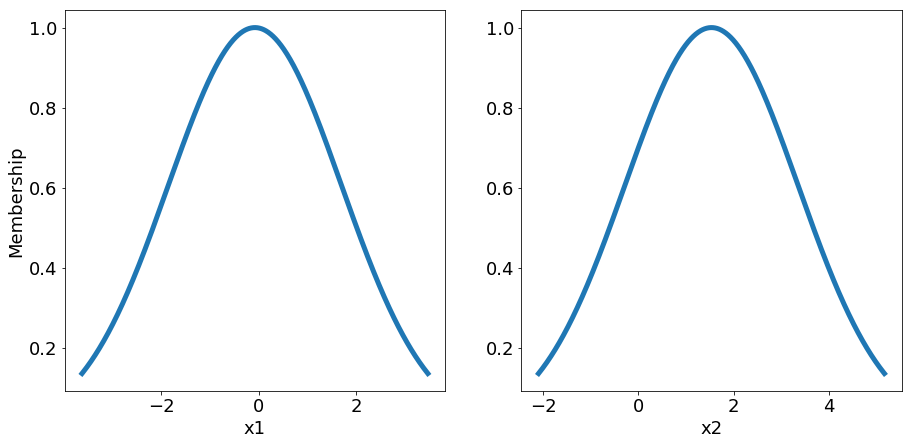

<Figure size 432x288 with 0 Axes>

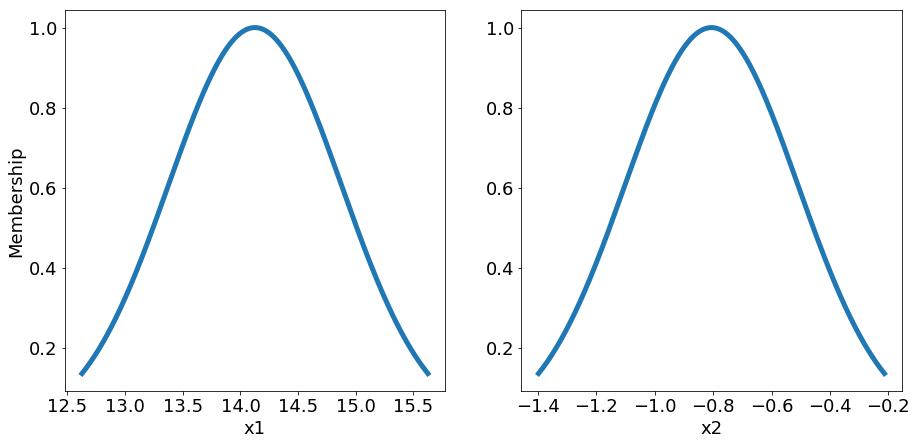

<Figure size 432x288 with 0 Axes>

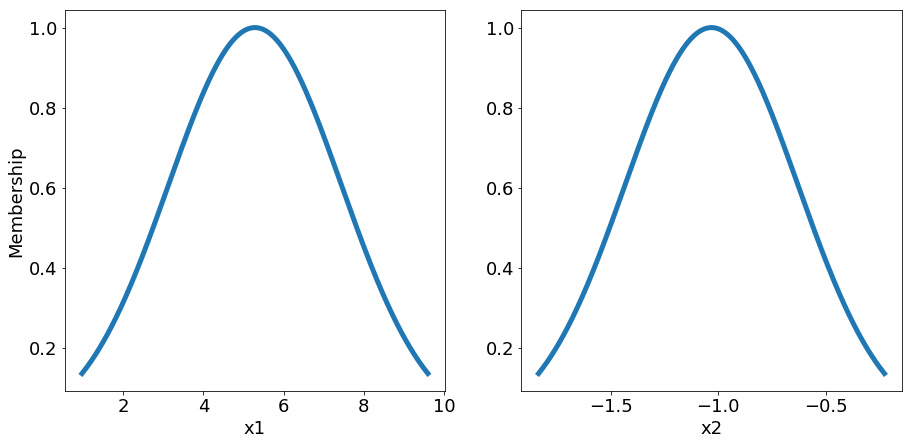

<Figure size 432x288 with 0 Axes>

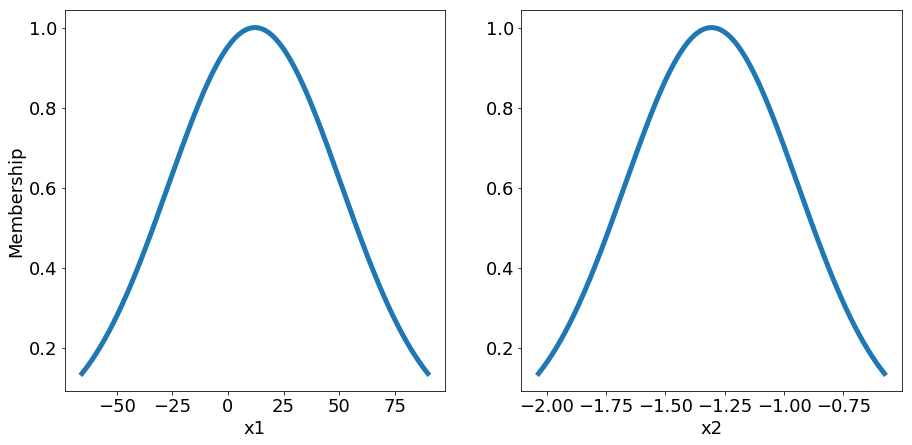

<Figure size 432x288 with 0 Axes>

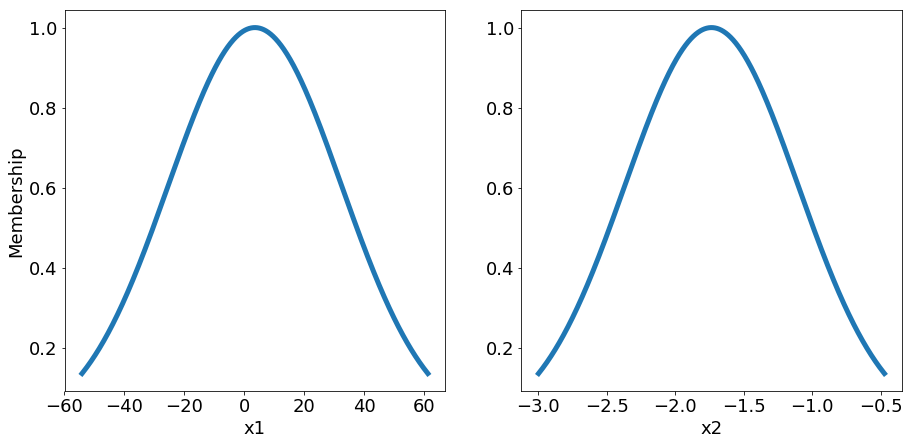

<Figure size 432x288 with 0 Axes>

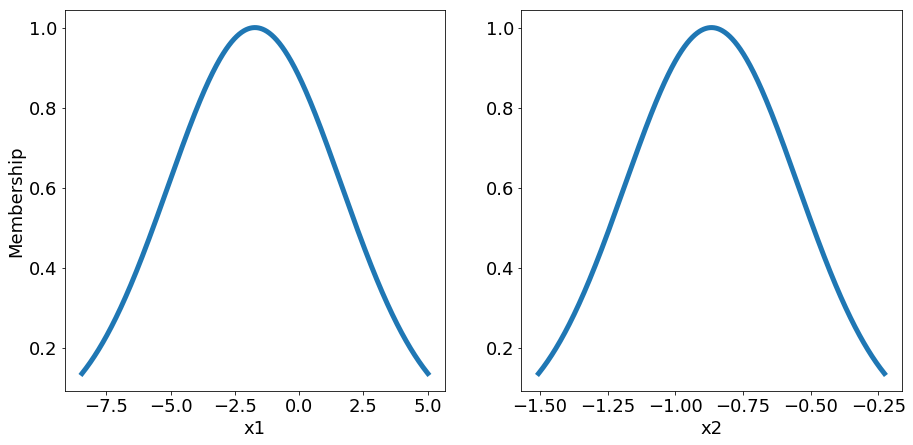

<Figure size 432x288 with 0 Axes>

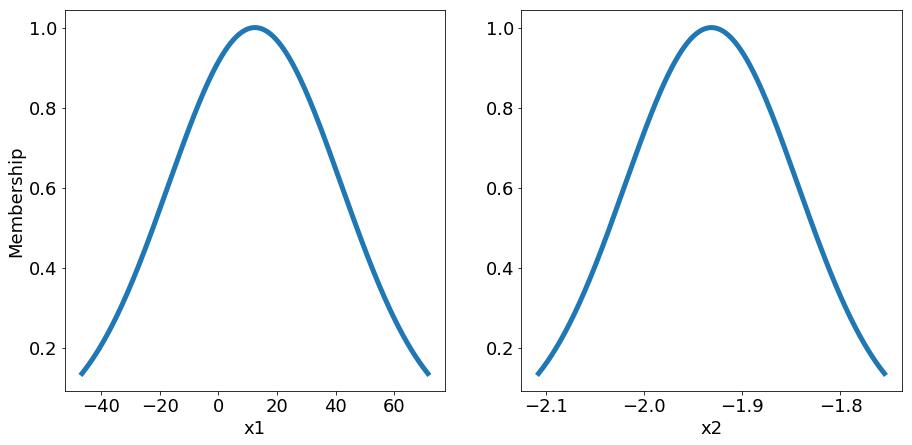

<Figure size 432x288 with 0 Axes>

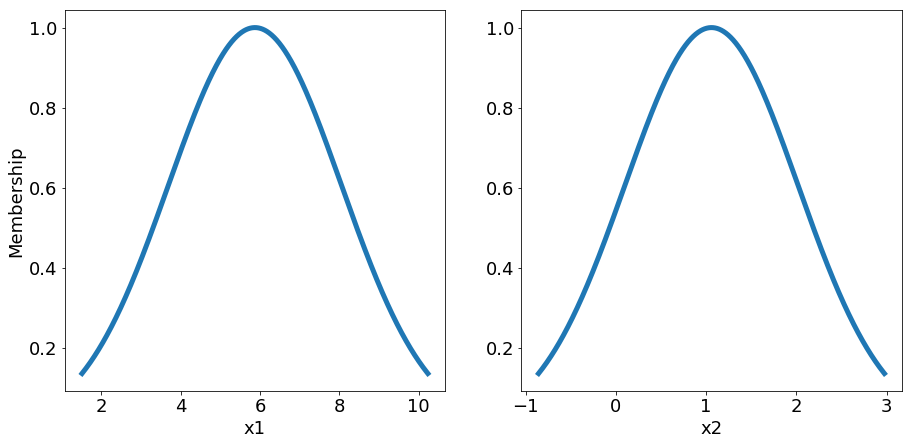

<Figure size 432x288 with 0 Axes>

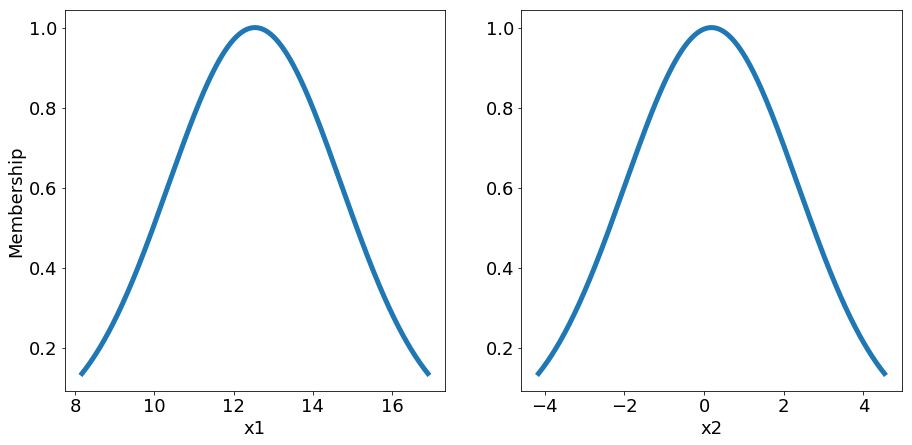

<Figure size 432x288 with 0 Axes>

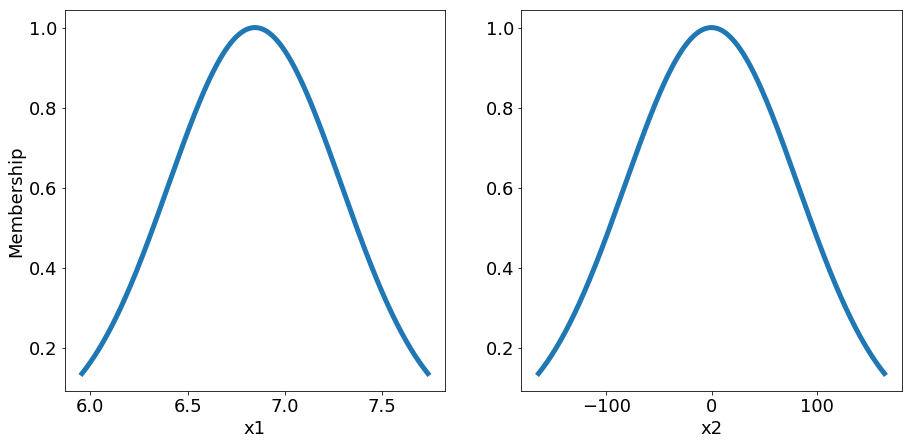

<Figure size 432x288 with 0 Axes>

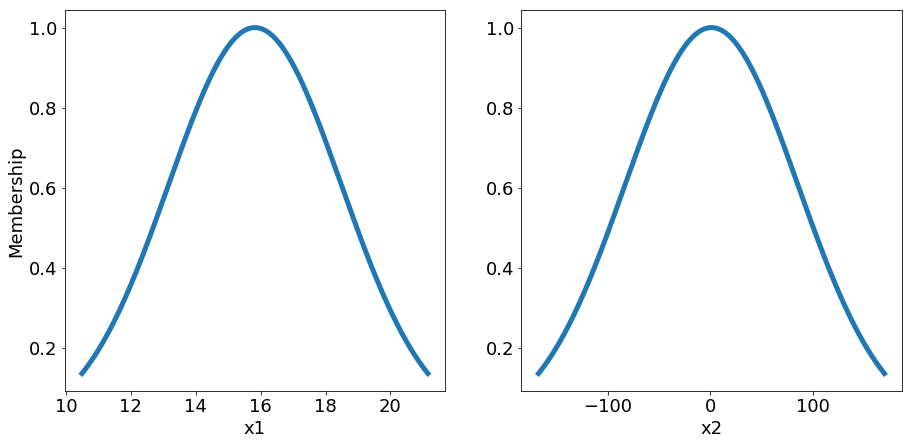

In [101]:
class_labels = ['Corrosive', 'Immune', 'Passive']

for all_centers, all_stds, class_label in zip(all_class_centers, tuned_stds, class_labels):
    # iterate through all classes
    
    for centers, stds in zip(all_centers, all_stds):
        # iterate through all rules
        rule = FuzzyRule(centers, stds, class_label)
        rule.plotRule()

## Decision boundaries in training data

In [102]:
xs = []
ys = []
training_labels = []

In [103]:
for data_point in data_corrosive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    training_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

    
for data_point in data_immune:
    xs.append(data_point[0])
    ys.append(data_point[1])
    training_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )
    
for data_point in data_passive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    training_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

In [104]:
training_data_points_df = pd.DataFrame(data={
    'x': xs,
    'y': ys,
    'label': training_labels
})

training_data_points_df.head()

,x,y,label
0,-1.513584,2.021725,Corrosive
1,-1.231298,2.011772,Corrosive
2,-1.247023,1.969969,Corrosive
3,-0.716827,2.007446,Corrosive
4,-0.831566,1.939361,Corrosive


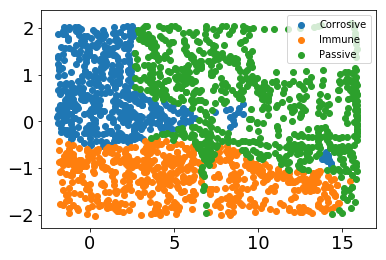

In [105]:
plt.scatter(
    training_data_points_df[training_data_points_df['label'] == 'Corrosive']['x'], 
    training_data_points_df[training_data_points_df['label'] == 'Corrosive'].y,
    label='Corrosive'
)

plt.scatter(
    training_data_points_df[training_data_points_df['label'] == 'Immune']['x'],
    training_data_points_df[training_data_points_df['label'] == 'Immune'].y,
    label='Immune'
)

plt.scatter(
    training_data_points_df[training_data_points_df['label'] == 'Passive'].x, 
    training_data_points_df[training_data_points_df['label'] == 'Passive'].y,
    label='Passive'
)

plt.legend()